## Fase 4: Problema de A/B Testing

El objetivo de esta fase es determinar si existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados, y si es así, cuál es la magnitud de esa relación. Partiremos de la siguiente hipótesis, "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa". Para ello deberéis crear una columna nueva en base al nivel de satisfacción en el trabajo para crear dos grupos, las condiciones para crear los grupos son:

-Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.

-Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.

La métrica principal que debes usar es la tasa de rotación de empleados (Attrition) en cada grupo. Recordemos que, en esta columna, "No" indica que el empleado no ha dejado la empresa (sin rotación), mientras que "Yes" indica que el empleado ha dejado la empresa (con rotación).

Por lo tanto, los pasos que deberás seguir en esta fase son:

-Divide a los empleados en los grupos A y B según los criterios establecidos.

-Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.

-Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

-Analiza los resultados.

-Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

In [17]:
# Importaciones necesarias
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos
dfab = pd.read_csv("DATA/df_clean_sin_duplicados.csv",index_col=0)

In [3]:
# Creacion de columna "nivel_satisfaccion", división a los empleados en grupos "satisfecho" y "no satisfecho" según los criterios establecidos.
dfab["nivel_satisfaccion"] = dfab["JOBSATISFACTION"].apply(lambda x: "satisfecho" if x >=3 else "no satisfecho")

In [4]:
# Calcular la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.
for e in dfab["nivel_satisfaccion"].unique():
    for i in dfab["ATTRITION"].unique():
        if i == 1:
            variable_attri = dfab[(dfab["ATTRITION"] == i) & (dfab["nivel_satisfaccion"] == e)]
            porcentaje = round(len(variable_attri["ATTRITION"] == 1) / dfab[dfab["nivel_satisfaccion"] == e].shape[0] * 100, 2)
            i = "se han ido de la empresa"
            print(f"Para el grupo que {i} en el nivel de satisfaccion: {e.upper()}, el porcentaje es {porcentaje} %")

Para el grupo que se han ido de la empresa en el nivel de satisfaccion: SATISFECHO, el porcentaje es 13.91 %
Para el grupo que se han ido de la empresa en el nivel de satisfaccion: NO SATISFECHO, el porcentaje es 20.0 %


In [5]:
# Realizar un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.

In [6]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(dfab["ATTRITION"], dfab["nivel_satisfaccion"])
tabla_contingencia

nivel_satisfaccion,no satisfecho,satisfecho
ATTRITION,,
0,484,823
1,121,133


In [7]:
# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor p de la prueba de chi-cuadrado:", p)

Valor p de la prueba de chi-cuadrado: 0.0019063855343316263


In [8]:
# Analizar los resultados

In [9]:
# Explicación: Tabla de contingencia: muestra la frecuencia de ocurrencia de los diferentes niveles de satisfacción ("no satisfecho" y "satisfecho") para los empleados que han rotado (1) y los que no han rotado (0).
# Resume la distribución de empleados rotados y no rotados según su nivel de satisfacción en el trabajo.
# Observamos que hay un mayor numero de empleados "satisfechos", que no han rotado. 

In [10]:
# Explicación: Tasa de rotación: Observamos que el porcentaje de rotación de los empleados satisfechos es de 13,91% y los empleados insatisfechos es de 20,00%

In [11]:
# Explicación: Prueba de chi-cuadrado:
# HO: No hay diferencia entre los grupos. 
# H1: Si hay diferencia entre los grupos.
# Si `p_value < 0.05`: Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que hay una diferencia significativa entre las dos muestras.
# Si `p_value >= 0.05`: No hay evidencia suficiente para rechazar la hipótesis nula. No podemos afirmar que haya una diferencia significativa entre las dos muestras.

# El valor p de la prueba de chi-cuadrado es de 0.0019, significativamente menor que el nivel de significancia comúnmente aceptado de 0.05, lo que lleva al rechazo de la hipótesis nula.
# Esto indica que existe una asociación significativa entre el nivel de satisfacción en el trabajo y la rotación de empleados.

In [12]:
# Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

In [13]:
# Calcular la diferencia de medias entre las dos categorías de satisfacción
diferencia_de_medias = dfab.groupby('nivel_satisfaccion')['ATTRITION'].mean().diff().iloc[-1]
diferencia_de_medias

-0.06087866108786613

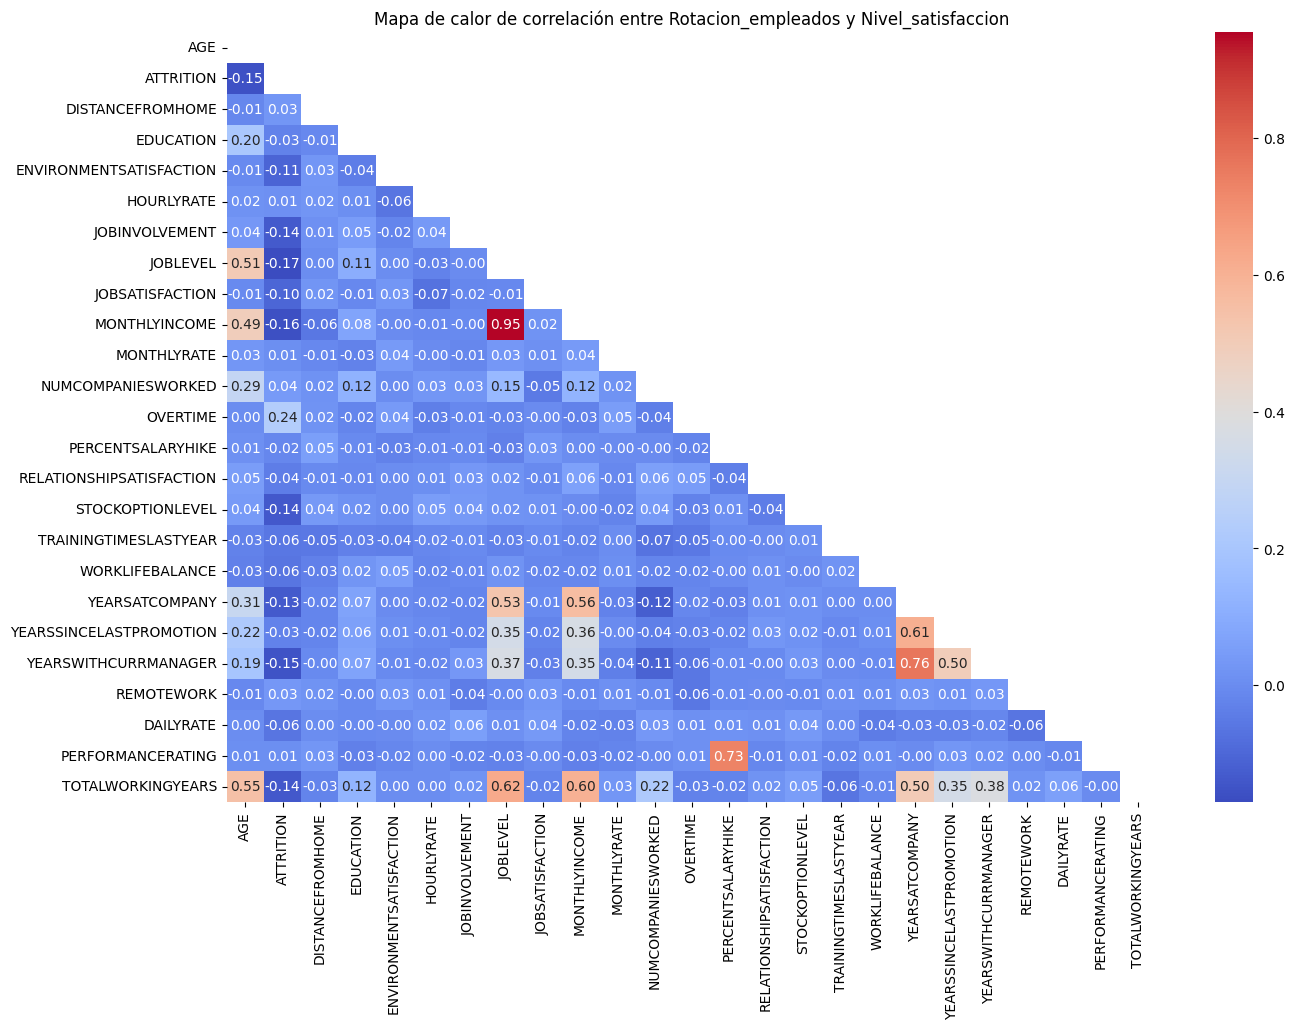

In [18]:
# Calcular la tabla de correlación
tabla_correlacion = dfab.corr(numeric_only= True)
mask = np.triu(np.ones_like(tabla_correlacion, dtype=bool))

# Ajustar el tamaño de la figura
plt.figure(figsize=(15, 10))

# Visualizar el mapa de calor (heatmap) de la tabla de correlación
sns.heatmap(tabla_correlacion, annot=True, cmap='coolwarm', fmt=".2f", mask = mask)
plt.title('Mapa de calor de correlación entre Rotacion_empleados y Nivel_satisfaccion')
plt.show()

In [ ]:
tabla_correlacion

,AGE,ATTRITION,DISTANCEFROMHOME,EDUCATION,ENVIRONMENTSATISFACTION,HOURLYRATE,JOBINVOLVEMENT,JOBLEVEL,JOBSATISFACTION,MONTHLYINCOME,...,STOCKOPTIONLEVEL,TRAININGTIMESLASTYEAR,WORKLIFEBALANCE,YEARSATCOMPANY,YEARSSINCELASTPROMOTION,YEARSWITHCURRMANAGER,REMOTEWORK,DAILYRATE,PERFORMANCERATING,TOTALWORKINGYEARS
AGE,1.000000,-0.153754,-0.013775,0.203294,-0.005964,0.015507,0.035625,0.508215,-0.007190,0.491221,...,0.041078,-0.027917,-0.033180,0.307825,0.217139,0.194707,-0.011251,0.000722,0.006009,0.548190
ATTRITION,-0.153754,1.000000,0.027257,-0.028533,-0.108765,0.011099,-0.135373,-0.170742,-0.101477,-0.160814,...,-0.136746,-0.057489,-0.061052,-0.132186,-0.027179,-0.149389,0.033600,-0.064057,0.005796,-0.136903
DISTANCEFROMHOME,-0.013775,0.027257,1.000000,-0.009615,0.030819,0.023013,0.011518,0.002267,0.024960,-0.057853,...,0.037545,-0.053531,-0.032411,-0.020187,-0.018924,-0.004115,0.019033,0.003167,0.029820,-0.025583
EDUCATION,0.203294,-0.028533,-0.009615,1.000000,-0.041504,0.005979,0.045156,0.105727,-0.011936,0.075162,...,0.017164,-0.034024,0.023204,0.070576,0.059976,0.068923,-0.003860,-0.004610,-0.032518,0.124570
ENVIRONMENTSATISFACTION,-0.005964,-0.108765,0.030819,-0.041504,1.000000,-0.062719,-0.017228,0.001337,0.029822,-0.000471,...,0.001328,-0.036077,0.047555,0.000067,0.008512,-0.007564,0.031062,-0.000257,-0.015108,0.001823
HOURLYRATE,0.015507,0.011099,0.023013,0.005979,-0.062719,1.000000,0.035833,-0.026143,-0.073540,-0.012534,...,0.051664,-0.016880,-0.020544,-0.015113,-0.005695,-0.016684,0.012966,0.019427,0.003474,0.001440
JOBINVOLVEMENT,0.035625,-0.135373,0.011518,0.045156,-0.017228,0.035833,1.000000,-0.002618,-0.016003,-0.004937,...,0.035892,-0.008033,-0.010827,-0.020403,-0.020682,0.031842,-0.042632,0.057658,-0.024892,0.019710
JOBLEVEL,0.508215,-0.170742,0.002267,0.105727,0.001337,-0.026143,-0.002618,1.000000,-0.009885,0.954103,...,0.020417,-0.028203,0.020642,0.531719,0.348295,0.368136,-0.004909,0.010300,-0.026262,0.622450
JOBSATISFACTION,-0.007190,-0.101477,0.024960,-0.011936,0.029822,-0.073540,-0.016003,-0.009885,1.000000,0.019257,...,0.014684,-0.005830,-0.015115,-0.006726,-0.023795,-0.031911,0.030173,0.036630,-0.003595,-0.021783
MONTHLYINCOME,0.491221,-0.160814,-0.057853,0.075162,-0.000471,-0.012534,-0.004937,0.954103,0.019257,1.000000,...,-0.000499,-0.023202,-0.015868,0.561400,0.364714,0.351621,-0.007529,-0.021643,-0.031013,0.599092


In [ ]:
# Explicación de la tabla de correlación: observamos una puntuación de -0,101477, lo cual indica que hay una relación negativa entre las dos variable.
# Además, el valor de correlación es cercano a cero, lo que sugiere que la relación no es muy fuerte. 